<a href="https://colab.research.google.com/github/stepsbtw/Statistical-Inference/blob/main/GCC1625_T4_CAIO_PASSOS_TORKST_FERREIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GCC1625 - Inferência Estatística
### Trabalho 04 - 2025.1
**Nome:** Caio Passos Torkst Ferreira

**Link do vídeo explicativo:** [INSIRA O LINK AQUI]

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1. GLMs - Regressão Logística

**Enunciado:**

A regressão logística é uma ferramenta fundamental na modelagem de variáveis categóricas binárias.
Neste item avaliativo, você aplicará esse modelo para identificar fatores associados à sobrevivência de passageiros no naufrágio do Titanic.

In [128]:
import pandas as pd

df = pd.read_csv("titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1. Ajustar um modelo de regressão logística para prever Survived, utilizando pelo menos três variáveis explicativas: Sex, Pclass, Age, SibSp, ou outras de sua escolha.

Vamos utilizar Age, mas existem valores faltantes. Tratar!

In [129]:
df_clean = df.dropna(subset=["Age"])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


Sex é variável categórica, preciso transformar em binária

In [130]:
df_clean["Sex_bin"] = (df_clean["Sex"] == "female").astype(int)
# 1 fem 0 masc

/tmp/ipython-input-130-2187651300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Sex_bin"] = (df_clean["Sex"] == "female").astype(int)


In [131]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = df_clean[["Sex_bin", "Age", "SibSp", "Pclass"]].values
X_ = sm.add_constant(X)
y = df_clean["Survived"].values

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)

model = sm.Logit(y_train, X_train)
model_fit = model.fit()

print(model_fit.summary())

Optimization terminated successfully.
         Current function value: 0.449854
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  571
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            4
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:                  0.3359
Time:                        04:16:39   Log-Likelihood:                -256.87
converged:                       True   LL-Null:                       -386.81
Covariance Type:            nonrobust   LLR p-value:                 4.836e-55
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0917      0.554      5.579      0.000       2.006       4.178
x1             2.5742      0.

### 2. Interpretar os coeficientes estimados, com especial atenção para o significado de sinais positivos e negativos em termos da chance de sobrevivência.

Na regressão logística, e^(coeficiente) indica a influência no valor de y ser 1.

- O gênero (x1) possui uma relação positiva com a predição, ou seja, ser do sexo feminino te faz mais provável de sobreviver.

- O número de irmãos/cônjuge (x3) tem relação negativa com a predição, ou seja, ter mais te faz menos provável de sobreviver.

- A idade (x2) não parece influenciar muito na predição (pouco mas negativo).

- A classe do ticket (x4) tem relação negativa com a predição, ou seja, ser de classe maior - mais baixa - (primeira, segunda, terceira) te faz menor provável de sobreviver.

- O intercepto (constante) representa, o valor esperado de y quando todas as variáveis independentes são iguais a 0, ou seja, sem saber nenhuma informação sobre o indivíduo qual sua probabilidade esperada de sobrevivência.


###3. Avaliar a significância estatística dos coeficientes e discutir quais variáveis possuem maior impacto na predição.

Com essas variáveis de treino para o modelo, todos os coeficientes são estatisticamente significativos, isto é, seus p-valores são menores que 0.05

### 4. Calcular a probabilidade estimada de sobrevivência para um passageiro do sexo feminino, 25 anos, na 1ª classe, viajando sozinho.

In [132]:
import numpy as np

x = np.array([1,1,25,0,1]) # adicionei constante direto
pred = model_fit.predict(x)
print(pred)

[0.96091128]


### 5. Avaliar o desempenho do modelo com métricas como acurácia, precisão, recall e matriz de confusão.

In [133]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = model_fit.predict(X_test)
y_pred_bin = (y_pred >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_bin)
print(cm)

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

print("accuracy = ", (TP + TN) / (TP+FP+TN+FN))
print("precision = ", TP / (TP+FP))
print("recall = ", TP / (TP+FN))


[[72 16]
 [12 43]]
accuracy =  0.8041958041958042
precision =  0.7288135593220338
recall =  0.7818181818181819


### 6. Verificar graficamente se há padrões nos resíduos de Pearson que indiquem problemas de ajuste.

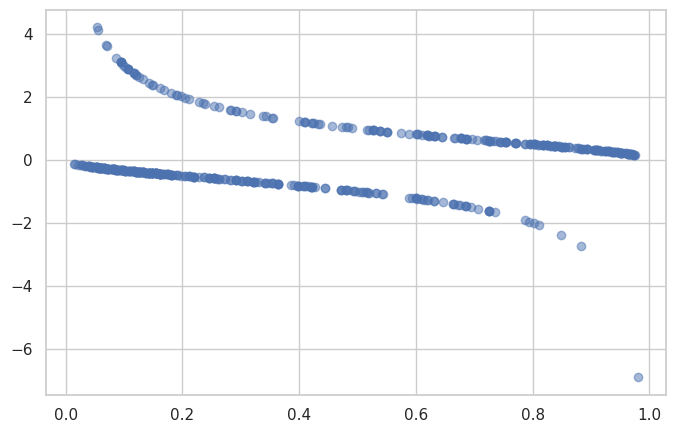

In [134]:
y_train_pred = model_fit.predict(X_train)

residuos = model_fit.resid_pearson

plt.scatter(y_train_pred, residuos, alpha=0.5)
plt.show()

# quao distante o observado esta do previsto, valores bons devem estar em torno de 0
# acha "outliers", valores grandes (em modulo)

A relação entre os preditores e a predição é não-linear, a Regressão Linear não é adequada neste caso.

## 2. GLMs - Regressão de Poisson

**Enunciado:**

Modelos Lineares Generalizados (GLMs) oferecem uma estrutura flexível para modelar variáveis resposta com distribuições da família exponencial.
Nesta tarefa, você irá explorar um caso em que a variável resposta é de contagem, ajustando modelos alternativos e avaliando a qualidade do ajuste.

1. Ajustar um modelo de regressão de Poisson para modelar a variável ‘cnt‘ com base em pelo menos três variáveis explicativas de sua escolha.


In [148]:
df = pd.read_csv("day.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Season : 	1:winter, 2:spring, 3:summer, 4:fall

Weekday : 0: sunday, 1: monday, 2: tuesday, 3: wednesday, 4: thursday, 5: friday, 6: saturday

In [151]:
X = df[["weekday","season","temp"]]
X_ = sm.add_constant(X)
y = df["cnt"]

X_train, X_test, y_train, y_test = train_test_split(X_,y,test_size=0.8)

poisson = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                  146
Model:                            GLM   Df Residuals:                      142
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39316.
Date:                Tue, 15 Jul 2025   Deviance:                       77153.
Time:                        04:49:18   Pearson chi2:                 6.97e+04
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4304      0.005   1427.591      0.0

2. Avaliar a presença de overdispersion comparando a deviance ao número de graus de liberdade. Em caso afirmativo, ajustar um modelo quasi-Poisson.


Overdispersion : Ocorre quando a variância dos dados observados é maior que a variância esperada pelo modelo.

Na distribuição Poisson : $Var(Y) = \mathbb{E}(Y)$.
- Se $Var(Y) > \mathbb{E}(Y)$, overdispersion.

Deviance : Medida de qualidade do ajuste em GLM, mede quao distante do modelo perfeito.

Se deviance >> graus de liberdade, overdispersion.
Teste com deviance / graus de liberade.

Quando tiver overdispersion, o erro padrão é subestimado.

In [152]:
dev = poisson.deviance
dof = len(X_train) - 4

print(dev)
print(dof)
print(dev/dof) # absurdamente overdispersed

77153.39616000425
142
543.3337757746779


Um modelo quasi-poisson ajusta sua variância com um fator de dispersão.
$Var(Y) = 𝜙 * \mathbb{E}(Y)$

In [153]:
# erro robusto -> equivalente a quasi poisson (nao nativo no python)
quasi_poisson = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit(cov_type='HC0')
print(quasi_poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                  146
Model:                            GLM   Df Residuals:                      142
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39316.
Date:                Tue, 15 Jul 2025   Deviance:                       77153.
Time:                        04:49:28   Pearson chi2:                 6.97e+04
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4304      0.121     61.167      0.0

Os coeficientes continuaram os mesmos! Porém ajustamos a significância.

### 3. Interpretar os coeficientes do modelo final, discutindo o sinal e o impacto das variáveis selecionadas.


- Nosso termo constante (intercepto) é significativo e positivo, o valor esperado da contagem sem nenhuma informação sobre o dia.

- O coeficiente de weekday é muito pequeno e além disso não é significativo (p-valor > 0.05), ou seja, o dia da semana não influência no aluguel das bicicletas por dia.

- O coeficiente season é positivo e muito significativo, dando entender que menos bikes são alugadas no inverno/primavera e mais no verão/outono.

- O coeficiente holiday é positivo e significativo, dias com temperaturas mais quentes costumam ter mais aluguéis de bicicleta.

### 4. Construir um gráfico de resíduos de deviance vs. valores previstos e avaliar se há padrões sistemáticos.


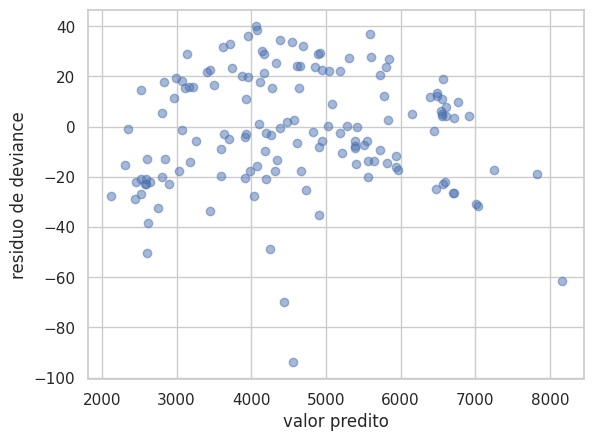

In [154]:
preds = quasi_poisson.fittedvalues # predicts no treino
residuos = quasi_poisson.resid_deviance

plt.scatter(preds, residuos, alpha=0.5)
plt.xlabel("valor predito")
plt.ylabel("residuo de deviance")
plt.show()

Os resíduos estão razoávelmente centrados em torno de 0, o que mostra uma boa estimativa da média da contagem.

Existe uma leve tendência de subida e descida no resíduo com a variação do valor predito, mas pouco.

### 5. Comparar o modelo final com um modelo de regressão linear simples (OLS) ajustado à mesma variável resposta. Discuta por que o modelo GLM é mais adequado neste caso.

In [155]:
linreg = sm.OLS(y_train, X_train).fit()

print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     44.41
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           2.64e-20
Time:                        04:55:01   Log-Likelihood:                -1265.3
No. Observations:                 146   AIC:                             2539.
Df Residuals:                     142   BIC:                             2551.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        447.9597    451.316      0.993      0.3

Em questão de resultado do treino, realmente os coeficientes significativos se manteram.

Porém a variável dependente que estamos prevendo é **discreta e não negativa**

Mais do que isso, a regressão linear assume **homecedasticidade**, o que vimos no gráfico que não é verdade. A variância de y cresce de acordo com a média (overdispersion), a variância não é constante.

Além disso, a regressão linear o impacto das variáveis independentes em unidades, o que não é verdade, aqui estamos relativizando com (%), o que é mais condizente para estas relações.

## 3. Pareamento por Escore de Propensão (PSM)

**Enunciado:**

Nesta parte, você irá aplicar o método de Pareamento por Escore de Propensão (PSM) para estimar o efeito da presença de diabetes sobre os gastos médicos totais de indivíduos, com base em dados observacionais.

Tarefas:
1. Análise Exploratória
  - Apresente uma análise descritiva das covariáveis (age, sex, race, poverty, marital_status).
  - Compare os grupos com e sem diabetes em termos dessas características e do desfecho (totexp).

2. Estimativa do Escore de Propensão
  - Modele a probabilidade de ter diabetes usando uma regressão logística com as covariáveis explicativas apropriadas.
  - Apresente os coeficientes estimados e discuta os fatores mais associados à presença de diabetes.

3. Pareamento 1:1 por escore de propensão
  - Realize o pareamento 1:1 sem reposição com base no escore estimado.
  - Avalie o balanceamento das covariáveis antes e depois do pareamento.

4. Estimativa do Efeito do Tratamento (ATT)
  - Calcule a diferença média nos gastos totais (totexp) entre indivíduos com diabetes e seus controles pareados.
  - Construa um intervalo de confiança para essa diferença com bootstrap.

5. Discussão
  - Comente sobre a qualidade do pareamento e possíveis vieses remanescentes.
  - Interprete o ATT obtido: qual o impacto médio estimado da diabetes sobre os gastos médicos?

### Explicação

[Adicione aqui suas explicações e análises.]

## 4. Inferência Bayesiana

**Enunciado:**

Nesta parte, você irá utilizar a inferência bayesiana para estimar a proporção de sobrevivência (θ) de passageiros, incorporando diferentes hipóteses a priori e comparando-as com a evidência empírica observada.

Tarefas:
1. Pré-processamento dos dados
  a) Filtre apenas os passageiros adultos (idade ≥ 18).
  b) Crie uma variável binária indicando se o passageiro sobreviveu (1) ou não (0).

2. Modelagem a priori para θ
  a) Escolha duas distribuições Beta para θ, por exemplo:
     - Beta(1,1): não informativa (uniforme)
     - Beta(2,5): refletindo a crença de que poucos adultos sobrevivem
  b) Justifique suas escolhas para as distribuições a priori.

3. Cálculo da distribuição a posteriori
  a) Determine os parâmetros da posteriori com base nos dados observados.
  b) Plote as distribuições a priori e a posteriori em um mesmo gráfico.
  c) Compare e interprete as distribuições resultantes.

4. Estatísticas da posteriori
  a) Calcule a média e o intervalo de credibilidade de 95% para θ, em cada cenário.
  b) Interprete os resultados obtidos, considerando o contexto do problema.

5. Discussão
  - Discuta como as diferentes escolhas de priori influenciaram os resultados.
  - Em que contextos o uso da abordagem bayesiana pode ser mais adequado do que abordagens frequentistas?

### Explicação

[Adicione aqui suas explicações e análises.]